In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
df = pd.read_csv("data_science_asia_clean.csv", index_col = 0)
df.head(5)


,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
1,470,55-59,Man,South Korea,No,('University Courses (resulting in a universit...,"('Kaggle (notebooks, competitions, etc)',)",Master’s degree,1-3 years,"('Python', 'SQL')","(' PyCharm ', ' Jupyter Notebook')","('None',)","(' Matplotlib ', ' Seaborn ')",1-2 years,"(' Scikit-learn ',)","('Linear or Logistic Regression', 'Decision Tr...","('No, I do not download pre-trained model weig...",NaN
2,174,25-29,Woman,China,Yes,"('Kaggle Learn Courses', 'University Courses (...","('University courses', 'Online courses (Course...",Master’s degree,< 1 years,"('Python', 'MATLAB')","(' Visual Studio ', ' MATLAB ', ' Jupyter Note...","('Colab Notebooks', 'Google Cloud Vertex AI Wo...",NaN,NaN,NaN,NaN,NaN,NaN
3,506,25-29,Man,Japan,No,"('Udemy',)","('Online courses (Coursera, EdX, etc)',)",Master’s degree,3-5 years,"('Python',)","(' Visual Studio Code (VSCode) ', ' Jupyter No...","(' Kaggle Notebooks', 'Colab Notebooks')","(' Seaborn ',)",2-3 years,"(' Scikit-learn ', ' PyTorch ', ' Xgboost ', ...","('Decision Trees or Random Forests', 'Dense Ne...","(' Huggingface Models ',)","('Kaggle (notebooks, forums, etc)',)"
4,283,22-24,Woman,China,Yes,('University Courses (resulting in a universit...,"('University courses', 'Social media platforms...",I prefer not to answer,< 1 years,"('Python', 'MATLAB', 'Other')","(' Visual Studio ', ' PyCharm ', ' MATLAB ')","('Google Cloud Vertex AI Workbench ',)","('None',)",Under 1 year,"(' TensorFlow ',)","('None',)","('Other storage services (i.e. google drive)',)","('Other',)"
5,492,40-44,Man,Japan,No,"('Kaggle Learn Courses',)","('Video platforms (YouTube, Twitch, etc)', 'Ka...",No formal education past high school,< 1 years,"('Python',)","(' Notepad++ ', ' Jupyter Notebook')","('None',)","('None',)",I do not use machine learning methods,NaN,NaN,NaN,"('Kaggle (notebooks, forums, etc)',)"


In [3]:
def convert_to_tuple(value):
    if pd.notna(value):
        return ast.literal_eval(value)
    else:
        return value
for col in df.columns:
    check_value = df[col].iloc[0]
    if (pd.isnull(check_value)):
        i = 1
        while(pd.isnull(check_value)):
            check_value = df[col].iloc[i]
            i += 1
    if isinstance(check_value, str):
        if(check_value[0] == '('):
            df[col] = df[col].apply(convert_to_tuple)
df.head(5)

,Duration,What is your age (# years)?,What is your gender?,In which country do you currently reside?,Are you currently a student?,On which platforms have you begun or completed data science courses?,What products or platforms did you find to be most helpful when you first started studying data science?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Do you use any of the following hosted notebook products?,Do you use any of the following data visualization libraries on a regular basis?,For how many years have you used machine learning methods?,Which of the following machine learning frameworks do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Do you download pre-trained model weights from any of the following services?,Who/what are your favorite media sources that report on data science topics?
1,470,55-59,Man,South Korea,No,(University Courses (resulting in a university...,"(Kaggle (notebooks, competitions, etc),)",Master’s degree,1-3 years,"(Python, SQL)","( PyCharm , Jupyter Notebook)","(None,)","( Matplotlib , Seaborn )",1-2 years,"( Scikit-learn ,)","(Linear or Logistic Regression, Decision Trees...","(No, I do not download pre-trained model weigh...",NaN
2,174,25-29,Woman,China,Yes,"(Kaggle Learn Courses, University Courses (res...","(University courses, Online courses (Coursera,...",Master’s degree,< 1 years,"(Python, MATLAB)","( Visual Studio , MATLAB , Jupyter Notebook)","(Colab Notebooks, Google Cloud Vertex AI Workb...",NaN,NaN,NaN,NaN,NaN,NaN
3,506,25-29,Man,Japan,No,"(Udemy,)","(Online courses (Coursera, EdX, etc),)",Master’s degree,3-5 years,"(Python,)","( Visual Studio Code (VSCode) , Jupyter Noteb...","( Kaggle Notebooks, Colab Notebooks)","( Seaborn ,)",2-3 years,"( Scikit-learn , PyTorch , Xgboost , Light...","(Decision Trees or Random Forests, Dense Neura...","( Huggingface Models ,)","(Kaggle (notebooks, forums, etc),)"
4,283,22-24,Woman,China,Yes,(University Courses (resulting in a university...,"(University courses, Social media platforms (R...",I prefer not to answer,< 1 years,"(Python, MATLAB, Other)","( Visual Studio , PyCharm , MATLAB )","(Google Cloud Vertex AI Workbench ,)","(None,)",Under 1 year,"( TensorFlow ,)","(None,)","(Other storage services (i.e. google drive),)","(Other,)"
5,492,40-44,Man,Japan,No,"(Kaggle Learn Courses,)","(Video platforms (YouTube, Twitch, etc), Kaggl...",No formal education past high school,< 1 years,"(Python,)","( Notepad++ , Jupyter Notebook)","(None,)","(None,)",I do not use machine learning methods,NaN,NaN,NaN,"(Kaggle (notebooks, forums, etc),)"


<h4><b>Phân tích số lượt bình chọn cho nền tảng/sản phẩm hữu ích để học khoa học dữ liệu ở bốn quốc gia</b></h4>

In [4]:
def create_new_array(fst, scd): 
    return np.append(fst, scd)

new_arr = [(np.array(tuple)) for tuple in df[df.columns[5]]]
platform_arr = new_arr[0]
for i in range(1, len(new_arr)):
    platform_arr = create_new_array(platform_arr, new_arr[i])
unique_platforms =  np.unique(platform_arr, return_counts=False)


In [5]:
vn_df = df[(df[df.columns[3]] == 'Viet Nam')]
jp_df = df[(df[df.columns[3]] == 'Japan')]
cn_df = df[(df[df.columns[3]] == 'China')]
kr_df = df[(df[df.columns[3]] == 'South Korea')]
countries = [ ]


In [6]:
def visualize(df):
    count_list = []
    
    for platform in unique_platforms:
        count = 0
        for tuple in df[df.columns[5]]:
            if platform in tuple:
                count += 1
        count_list.append(count)
    return count_list

vn_count = visualize(vn_df)
cn_count = visualize(cn_df)
jp_count = visualize(jp_df)
kr_count = visualize(kr_df)

unique_platforms[0] = unique_platforms[0][:unique_platforms[0].find(' (')]
unique_platforms[10] = unique_platforms[10][:unique_platforms[10].find(' (')]

# tạo dataframe
count_matrix = np.array([vn_count, cn_count, jp_count, kr_count])
vision_df = pd.DataFrame(count_matrix, columns=unique_platforms)
vision_df.insert(0, "Country", ['Viet Nam', 'China', 'Japan', 'Korea'], False)

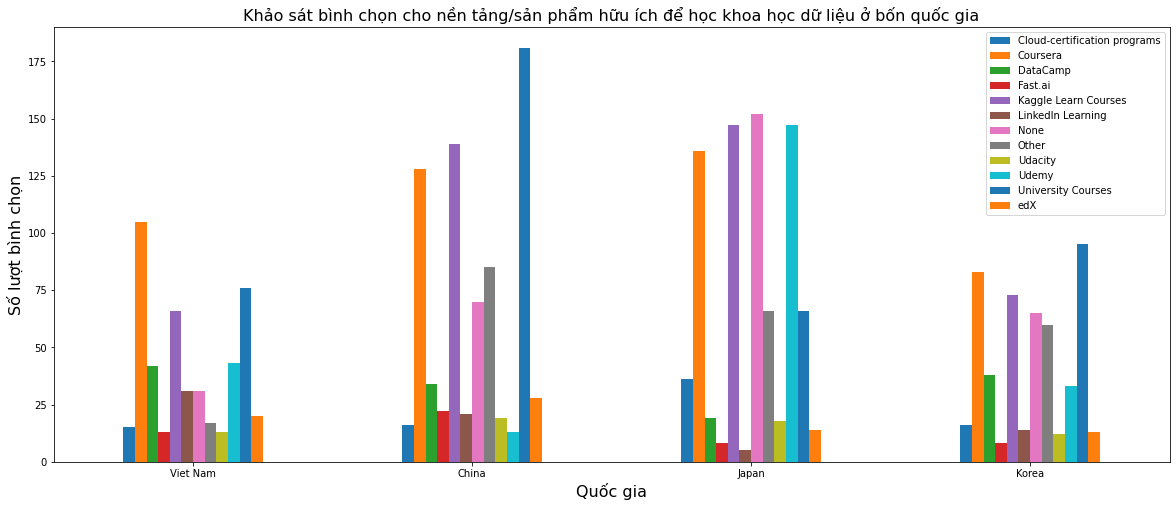

In [7]:
# vẽ biểu đồ
vision_df.plot(x="Country", y=unique_platforms, kind="bar",figsize=(20,8))
plt.xticks(rotation = 'horizontal')
plt.title("Khảo sát bình chọn cho nền tảng/sản phẩm hữu ích để học khoa học dữ liệu ở bốn quốc gia", fontsize=16)
plt.xlabel('Quốc gia', fontsize=16)
plt.ylabel('Số lượt bình chọn', fontsize=16)
plt.rc('font', size=12)
plt.show()

### Nhận xét:
- Nhìn chung, đa số người tham gia khảo sát ở cả 4 quốc gia đều chọn các nền tảng nổi tiếng, uy tín như Coursera, Kaggle Learn Courses, University Courses để học khoa học dữ liệu. Bên cạnh đó, số lượng người chọn "Không" cũng chiếm số lượng khá lớn. Các nền tảng ít được chọn nhất là Fast.ai, Linkedin Learning, Udacity

- Tại Việt Nam, Coursera là nền tảng được nhiều lượt chọn nhất (hơn 100 lượt bình chọn), tiếp đến là học thông qua chương trình đại học (University Courses), sau đó là Udemy, DataCamp. Cloud-certification programs, Fast.ai, Udacity là những nền tảng ít được bình chọn nhất. Có thể thấy, người học khoa học dữ liệu ở Việt Nam vẫn ưu tiên lựa chọn các nền tảng nổi tiếng, uy tín, được nhiều người sử dụng trên thế giới hoặc là phương thức học truyền thống - chương trình đại học để trau dồi kỹ năng của mình.

- Tại Trung Quốc, University Courses là lựa chọn hàng đầu để học khoa học dữ liệu với hơn 180 lượt bình chọn, sau đó là Kaggle Learn Courses, Coursera, tuy nhiên, số lượt bình chọn cho "Không" cũng khá cao. Các nền tảng ít được sử dụng là Cloud-certification programs, Fast.ai, Udemy, Udacity, Linkedin Learning. Có thể thấy tại Trung Quốc, University Courses vẫn là lựa chọn ưu tiên hàng đầu để mọi người học khoa học dữ liệu.

- Tại Nhật bản, số lựa chọn "Không" chiếm số lượng lớn câu trả lời, tiếp đến là các nền tảng online như Kaggle Learn Courses, Udemy, Coursera. Lựa chọn thấp nhất thuộc về Linkedin Learning, Fast.ai, edX. Có thể thấy ở Nhật bản, nhiều người tham gia khảo sát chưa thấy các nền tảng/sản phẩm thật sự hữu ích. Mặt khác, nhiều người đánh giá Kaggle Learn Courses, Udemy, Coursera rất hữu ích và nổi trội hơn hẳn so với các nền tảng còn lại.

- Tại Hàn Quốc, University Courses là lựa chọn hàng đầu để học khoa học dữ liệu, sau đó là Coursera, Kaggle Learn Courses. Các nền tảng ít được sử dụng là Fast.ai, Linkedin Learning, Udacity, edX. Có thể thấy tại Hàn Quốc, University Courses vẫn là lựa chọn ưu tiên hàng đầu để mọi người học khoa học dữ liệu, tiếp đến là các nền tảng online như Coursera, Kaggle Learn Courses. Mặt khác, nhiều người tham gia khảo sát chưa thấy các nền tảng/sản phẩm thật sự hữu ích khi số lượt bình chọn "Không" vẫn khá cao.

<h4><b>Phân tích ngôn ngữ lập trình phổ biển dùng cho học khoa học dữ liệu ở bốn quốc gia</b></h4>

In [8]:
def create_new_array(fst, scd): 
    return np.append(fst, scd)

new_arr = [(np.array(tuple)) for tuple in df[df.columns[9]]]
language_arr = new_arr[0]
for i in range(1, len(new_arr)):
    language_arr = create_new_array(language_arr, new_arr[i])
unique_languages =  np.unique(language_arr, return_counts=False)

# xóa nan
unique_languages = np.delete(unique_languages, np.where(unique_languages == "nan"))

In [9]:
count_list = []
check_for_nan = df[df.columns[9]].isnull()
for language in unique_languages:
    count = 0
    for tuple, is_nan in zip(df[df.columns[9]], check_for_nan):
        if is_nan == False and language in tuple:
            count += 1
    count_list.append(count)

sum_counts = sum(count_list)
language_rate_list = [round((val/sum_counts)*100, 2) for val in count_list]

language_rate_matrix = np.matrix([unique_languages, language_rate_list])
language_rate_matrix = language_rate_matrix.transpose()
language_rate_matrix

language_rate_df = pd.DataFrame(language_rate_matrix, columns=['Programming language', 'Percentage'])
language_rate_df['Percentage'] = language_rate_df['Percentage'].astype(float)
language_rate_df = language_rate_df.sort_values(by=['Percentage'], ascending=True)

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_18768/1858783231.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


Text(0.5, 0, 'Tỷ lệ (%)')

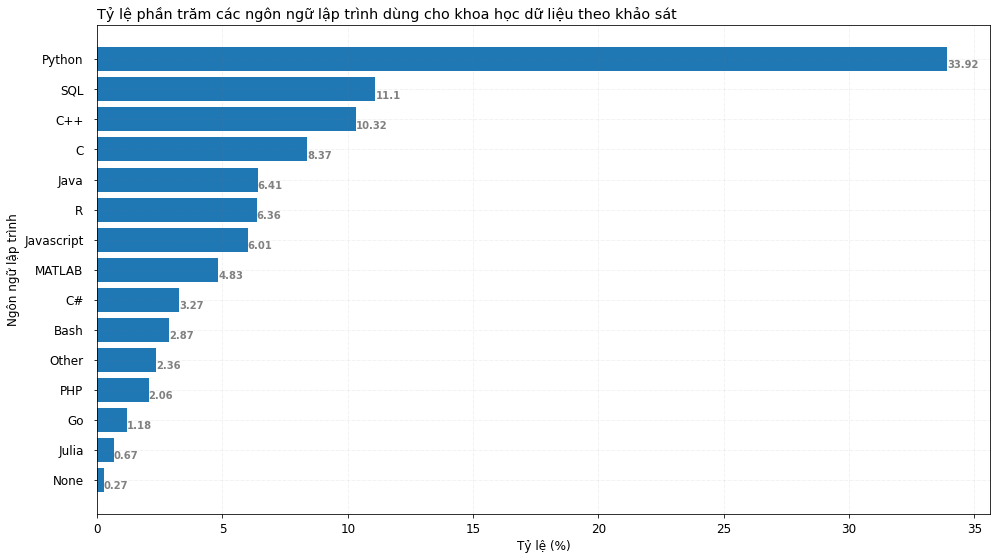

In [10]:
#vẽ biểu đồ
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
language = language_rate_df['Programming language']
percentage = language_rate_df['Percentage']
ax.barh(language, percentage)

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

#  Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y() + 0.1,
             str(i.get_width()),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Tỷ lệ phần trăm các ngôn ngữ lập trình dùng cho khoa học dữ liệu theo khảo sát',
             loc ='left', )
ax.set_ylabel("Ngôn ngữ lập trình")
ax.set_xlabel("Tỷ lệ (%)")
 

### Nhận xét:
- Nhìn vào biểu đồ, có thể thấy Python là ngôn ngữ lập trình được sử dụng nhiều nhất trong lĩnh vực khoa học dữ liệu ở 4 quốc gia khảo sát với tỷ lệ 33,92%. Đứng thứ hai là SQL với 11,1%, thứ ba là C++ với 10.32%. Các ngôn ngữ lập trình có tỷ lệ sử dụng ít nhất là Julia (0.67%), Go (1.18%), PHP (2.36%).

- Có thể nói Python chiếm tỷ lệ áp đảo là nhờ vào các thư viện được thiết kế cho khoa học dữ liệu như Numpy, Tensorflow, Keras, Scikit-Learn, v.v, giúp mọi giai đoạn phân tích dữ liệu trở nên thuận tiện và dễ dàng hơn. Ngoài ra cú pháp đơn giản, dễ đọc, dễ viết và có tốc độ thực thi nhanh hơn nhiều so với các ngôn ngữ lập trình khác. Python cũng là ngôn ngữ được ưu tiên sử dụng dành cho người mới bắt đầu học khoa học dữ liệu

- SQL là ngôn ngữ cần thiết cho quá trình truy cập cơ sở dữ liệu và thực hiện các thao tác với dữ liệu. SQL giữ vai trò quan trong trong khoa học dữ liệu.

- C++ là ngôn ngữ lập trình đa năng, có thể hỗ trợ làm việc với khối lượng dữ liệu lớn một cách hiệu quả và nhanh chóng.

In [11]:
new_arr = [(np.array(tuple)) for tuple in df[df.columns[15]]]
ML_algo_arr = new_arr[0]
for i in range(1, len(new_arr)):
    ML_algo_arr = create_new_array(ML_algo_arr, new_arr[i])
unique_ML_algos =  np.unique(ML_algo_arr, return_counts=False)

# xóa nan, none
unique_ML_algos = np.delete(unique_ML_algos, np.where(unique_ML_algos == "None"))
unique_ML_algos = np.delete(unique_ML_algos, np.where(unique_ML_algos == "nan"))
unique_ML_algos

unique_ML_exp = ['Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years',
       '5-10 years', '10-20 years']

In [12]:
matrix = []
for ML_algo in unique_ML_algos:
    row = []
    for year_exp in unique_ML_exp:
        tmp_df = df.query("`For how many years have you used machine learning methods?` == @year_exp")
        check_for_nan = tmp_df[tmp_df.columns[15]].isnull()

        total_row = tmp_df[tmp_df.columns[15]].count()
        count = 0
        for data, is_nan in zip(tmp_df[tmp_df.columns[15]], check_for_nan):
            if is_nan == True:
                continue
            if ML_algo in data:
                count += 1
        row.append(count/total_row)
    matrix.append(row)

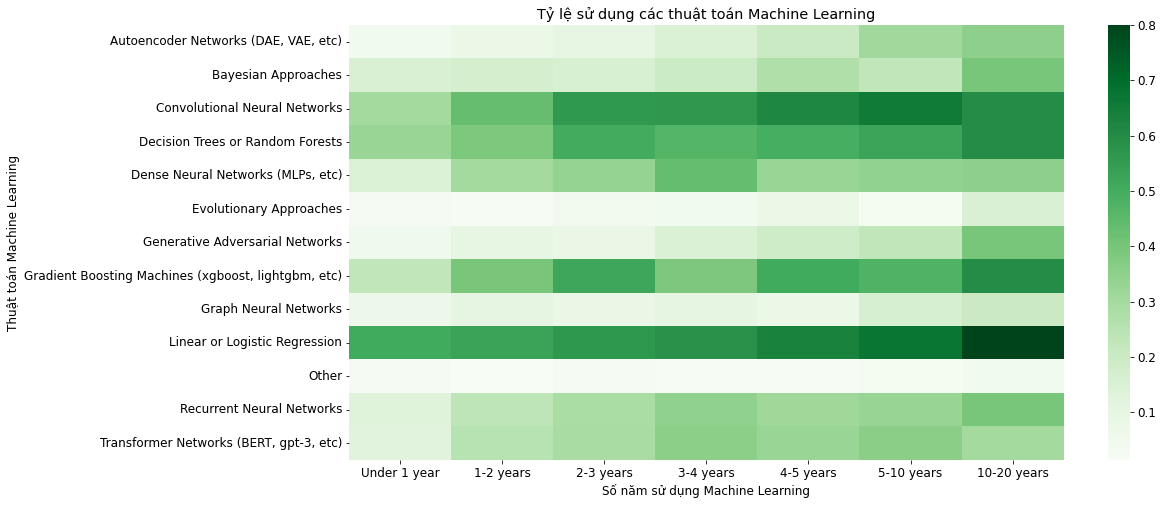

In [13]:
df_visual = pd.DataFrame(matrix,unique_ML_algos , unique_ML_exp)

plt.figure(figsize=(16,8))
sns.heatmap(df_visual, cmap = "Greens")
plt.title("Tỷ lệ sử dụng các thuật toán Machine Learning")
plt.xlabel("Số năm sử dụng Machine Learning")
plt.ylabel("Thuật toán Machine Learning")
plt.rc('font', size=16)
plt.show()

### Nhận xét:
- Nhìn vào biểu đồ, có thể thấy những nhà khoa học dữ liệu càng có nhiều năm kinh nghiệm sử dụng Machine Learning thì tương ứng với đó là khả năng sử dụng/thành thạo nhiều thuật toán Machine Learning hơn những người mới bắt đầu.

- Linear or Logistic Regression, Convolutional Neural Networks, Decision Trees or Random Forests, Gradient Boosting Machines (xgboost, lightgbm, etc) là những thuật toán thường được sử dụng nhiều nhất từ dưới 1 năm kinh nghiệm đến 10-20 năm kinh nghiệm, trong đó Linear ỏ Logistic Regression có tỷ lệ sử dụng cao nhất. Những thuật toán này là những thuật toán cơ bản trong Machine Learning nên có thể dễ dàng sử dụng và mang lại hiệu quả cao ngay từ những năm đầu kinh nghiệm.

- Các thuật toán Autoencoder Networks (DAE, VAE, etc), Evolutionary Approaches, Generative Adversarial Networks, Graph Neural Networks là những thuật toán ít được sử dụng, đặc biệt đối với những người dưới 4 năm kinh nghiệm, tuy nhiên, với những người hơn 4 năm kinh nghiệm, các thuật toán này được sử dụng nhiều hơn. Có thể do các thuật toán này có độ phức tạp cao, đòi hỏi nhiều thời gian nghiên cứu mới có thể sử dụng hiệu quả.